In [47]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv('./Data/SCMAB_data/preprocesseddatacontrols.csv')

# Assuming df is your DataFrame
bins = np.arange(10, 85, 1)
df['reward_bin'] = pd.cut(df['Previous reward'], bins=bins, right=False)

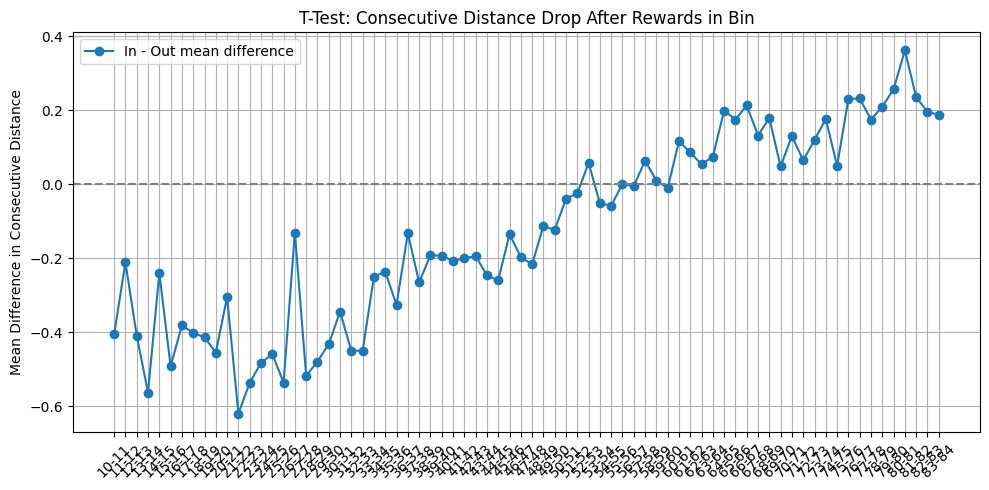

      bin  in_bin_mean  out_bin_mean  mean_diff   one_sided_p
50  60-61     1.799935      1.915969   0.116034  1.841003e-03
51  61-62     1.829762      1.915359   0.085597  1.769868e-02
53  63-64     1.840809      1.915113   0.074304  3.641875e-02
54  64-65     1.719932      1.918748   0.198816  7.553467e-08
55  65-66     1.743662      1.918096   0.174434  3.889367e-06
56  66-67     1.707126      1.919686   0.212560  1.613968e-09
57  67-68     1.785446      1.916754   0.131308  7.228772e-04
58  68-69     1.739327      1.917539   0.178212  1.683524e-05
60  70-71     1.785949      1.916283   0.130335  9.056371e-04
62  72-73     1.796425      1.915712   0.119288  3.776529e-03
63  73-74     1.740530      1.916570   0.176041  5.564097e-05
65  75-76     1.686930      1.916745   0.229815  4.702318e-06
66  76-77     1.684872      1.916505   0.231633  2.482252e-05
67  77-78     1.741012      1.915379   0.174368  1.874785e-03
68  78-79     1.706617      1.915779   0.209162  1.714409e-04
69  79-8

In [49]:
results = []

for bin_range in df['reward_bin'].cat.categories:
    in_bin = df[df['reward_bin'] == bin_range]['Consecutive Distance Manhattan']
    out_bin = df[df['reward_bin'] != bin_range]['Consecutive Distance Manhattan']
    
    # Run two-sided t-test
    t_stat, p_val = ttest_ind(in_bin, out_bin, equal_var=False, nan_policy='omit')
    
    # Directional check: want to know if in_bin has lower mean
    mean_diff = out_bin.mean() - in_bin.mean()
    one_sided_p = p_val / 2 if mean_diff > 0 else 1 - (p_val / 2)


    results.append({
        'bin': f'{int(bin_range.left)}-{int(bin_range.right)}',
        'in_bin_mean': in_bin.mean(),
        'out_bin_mean': out_bin.mean(),
        'mean_diff': mean_diff,
        'one_sided_p': one_sided_p
    })

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
plt.plot(results_df['bin'], results_df['mean_diff'], marker='o', label='In - Out mean difference')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Mean Difference in Consecutive Distance')
plt.title('T-Test: Consecutive Distance Drop After Rewards in Bin')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Show significant results
print(results_df[results_df['one_sided_p'] < 0.05])


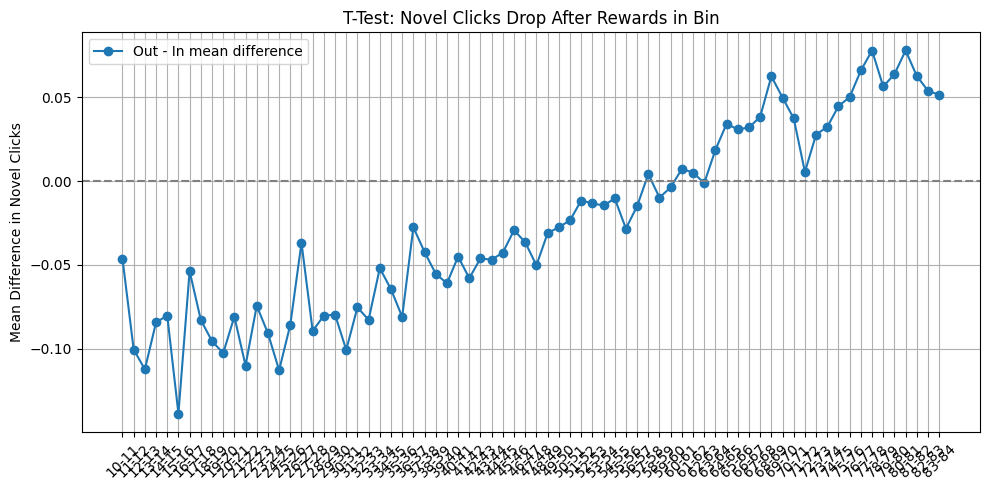

      bin  in_bin_mean  out_bin_mean  mean_diff   one_sided_p
53  63-64     0.694758      0.713394   0.018637  8.734765e-03
54  64-65     0.679620      0.713863   0.034244  5.803309e-06
55  65-66     0.682914      0.713779   0.030865  3.277474e-05
56  66-67     0.681852      0.713884   0.032032  9.001158e-06
57  67-68     0.675535      0.713974   0.038439  5.235614e-07
58  68-69     0.651907      0.714469   0.062563  8.411972e-14
59  69-70     0.664177      0.714079   0.049903  3.700122e-09
60  70-71     0.676397      0.713810   0.037413  4.230136e-06
62  72-73     0.685675      0.713503   0.027829  7.449137e-04
63  73-74     0.681142      0.713525   0.032382  2.557068e-04
64  74-75     0.668948      0.713696   0.044748  2.713241e-06
65  75-76     0.663475      0.713698   0.050223  7.671199e-07
66  76-77     0.647815      0.713883   0.066068  8.273674e-10
67  77-78     0.635942      0.713930   0.077988  1.497763e-11
68  78-79     0.657092      0.713616   0.056525  7.173003e-07
69  79-8

In [50]:
results = []

for bin_range in df['reward_bin'].cat.categories:
    in_bin = df[df['reward_bin'] == bin_range]['Novel Click']
    out_bin = df[df['reward_bin'] != bin_range]['Novel Click']
    
    # Run two-sided t-test
    t_stat, p_val = ttest_ind(in_bin, out_bin, equal_var=False, nan_policy='omit')
    
    # Directional check: want to know if in_bin has lower mean
    mean_diff = out_bin.mean() - in_bin.mean()
    one_sided_p = p_val / 2 if mean_diff > 0 else 1 - (p_val / 2)


    results.append({
        'bin': f'{int(bin_range.left)}-{int(bin_range.right)}',
        'in_bin_mean': in_bin.mean(),
        'out_bin_mean': out_bin.mean(),
        'mean_diff': mean_diff,
        'one_sided_p': one_sided_p
    })

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
plt.plot(results_df['bin'], results_df['mean_diff'], marker='o', label='Out - In mean difference')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Mean Difference in Novel Clicks')
plt.title('T-Test: Novel Clicks Drop After Rewards in Bin')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Show significant results
print(results_df[results_df['one_sided_p'] < 0.05])



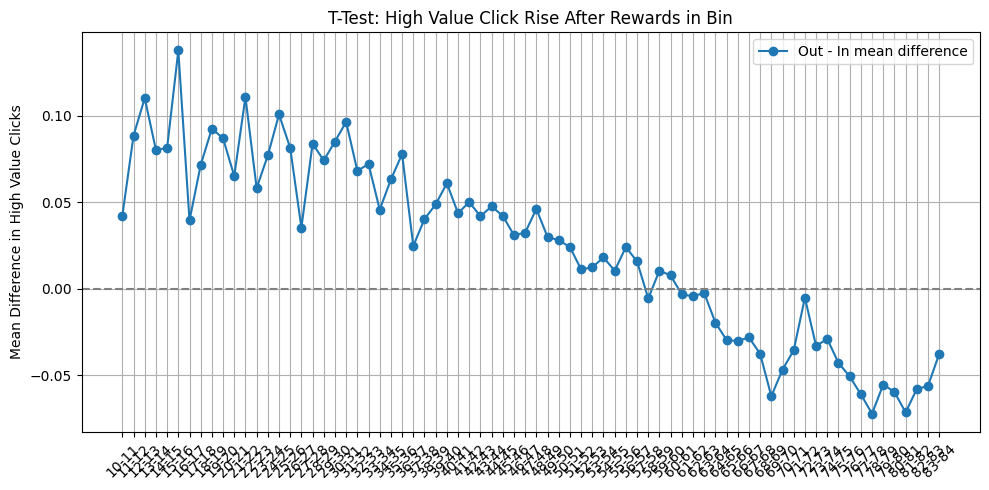

      bin  in_bin_mean  out_bin_mean  mean_diff   one_sided_p
53  63-64     0.287486      0.267910  -0.019576  5.539671e-03
54  64-65     0.297283      0.267599  -0.029684  5.190633e-05
55  65-66     0.297804      0.267570  -0.030234  3.454027e-05
56  66-67     0.295743      0.267568  -0.028175  5.896898e-05
57  67-68     0.304992      0.267381  -0.037611  5.909204e-07
58  68-69     0.329028      0.266872  -0.062157  5.589543e-14
59  69-70     0.314063      0.267328  -0.046735  1.781513e-08
60  70-71     0.303202      0.267565  -0.035636  7.867139e-06
62  72-73     0.300765      0.267710  -0.033055  6.698000e-05
63  73-74     0.296948      0.267872  -0.029076  7.291276e-04
64  74-75     0.310522      0.267670  -0.042852  4.713817e-06
65  75-76     0.318334      0.267625  -0.050709  4.264822e-07
66  76-77     0.328535      0.267525  -0.061010  7.361127e-09
67  77-78     0.339710      0.267479  -0.072231  1.934903e-10
68  78-79     0.323160      0.267729  -0.055431  8.009632e-07
69  79-8

In [51]:
results = []

for bin_range in df['reward_bin'].cat.categories:
    in_bin = df[df['reward_bin'] == bin_range]['High Value Click']
    out_bin = df[df['reward_bin'] != bin_range]['High Value Click']
    
    # Run two-sided t-test
    t_stat, p_val = ttest_ind(in_bin, out_bin, equal_var=False, nan_policy='omit')
    
    # Directional check: want to know if in_bin has lower mean
    mean_diff = out_bin.mean() - in_bin.mean()
    # We're testing: is in_bin > out_bin?
    one_sided_p = p_val / 2 if mean_diff < 0 else 1 - (p_val / 2)
    # Append results

    results.append({
        'bin': f'{int(bin_range.left)}-{int(bin_range.right)}',
        'in_bin_mean': in_bin.mean(),
        'out_bin_mean': out_bin.mean(),
        'mean_diff': mean_diff,
        'one_sided_p': one_sided_p
    })

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
plt.plot(results_df['bin'], results_df['mean_diff'], marker='o', label='Out - In mean difference')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Mean Difference in High Value Clicks')
plt.title('T-Test: High Value Click Rise After Rewards in Bin')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Show significant results
print(results_df[results_df['one_sided_p'] < 0.05])

